## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

## Importing Data

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 11s 1us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train[0].shape

(28, 28)

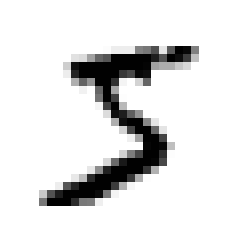

In [9]:
plt.matshow(X_train[0], cmap = 'binary')
plt.axis('off');

In [10]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255

## ANN

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_split= 0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.9133 - val_loss: 0.1685 - val_accuracy: 0.9523
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1364 - accuracy: 0.9604 - val_loss: 0.1332 - val_accuracy: 0.9613
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0961 - accuracy: 0.9721 - val_loss: 0.1065 - val_accuracy: 0.9694
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0736 - accuracy: 0.9788 - val_loss: 0.0976 - val_accuracy: 0.9709
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9829 - val_loss: 0.0984 - val_accuracy: 0.9691
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0961 - val_accuracy: 0.9712
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.0979 - val_accuracy:

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9762


[0.08520650118589401, 0.9761999845504761]

In [18]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [19]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

## CNN

In [20]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_split= 0.2)

Epoch 1/5
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1752 - accuracy: 0.9486 - val_loss: 0.0735 - val_accuracy: 0.9784
Epoch 2/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0581 - accuracy: 0.9824 - val_loss: 0.0710 - val_accuracy: 0.9796
Epoch 3/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0596 - val_accuracy: 0.9822
Epoch 4/5
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0539 - val_accuracy: 0.9847
Epoch 5/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0626 - val_accuracy: 0.9825


In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0509 - accuracy: 0.9841


[0.05092816427350044, 0.9840999841690063]

#### Using CNN, we get around 98.4% accuracy which is really good.